# [範例重點]
- 各種樣式的長條圖(Bar) (In[4], Out[4])   
- 不同的 KDE 曲線與繪圖設定 (In[5], Out[5]) 以及切換不同 Kernel function 的效果 (In[6], Out[6])

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #另一個會圖樣式套件
%matplotlib inline

#忽略警告訊息


dir_dir = './data/'

In [6]:
#讀取檔案

f_app = os.path.join(dir_dir, "application_train.csv")
print('Path of read in data: %s' %(f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#資料整理( 'Days_birth' 全部取絕對值)
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

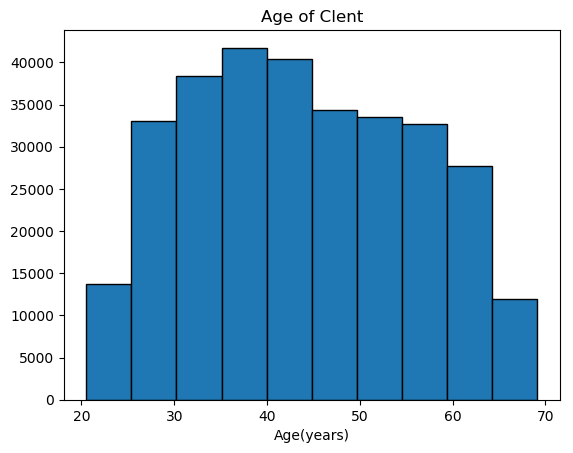

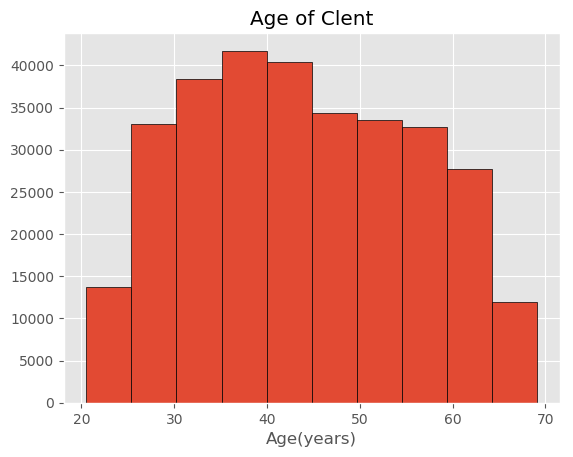

In [18]:
#以身存年樹繪製分布圖
plt.style.use('default')
plt.hist(app_train['DAYS_BIRTH']/ 365, edgecolor = 'k', bins = 10)
plt.title('Age of Clent'); plt.xlabel('Age(years)'); plt.ylabel = ('Count');
plt.show()

#改變繪圖樣式(style)
plt.style.use('ggplot')

#改變樣式後再會圖一次 比較效果
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor = 'k', bins = 10)
plt.title('Age of Clent'); plt.xlabel('Age(years)'); plt.ylabel = ('Count');
plt.show()

TypeError: 'str' object is not callable

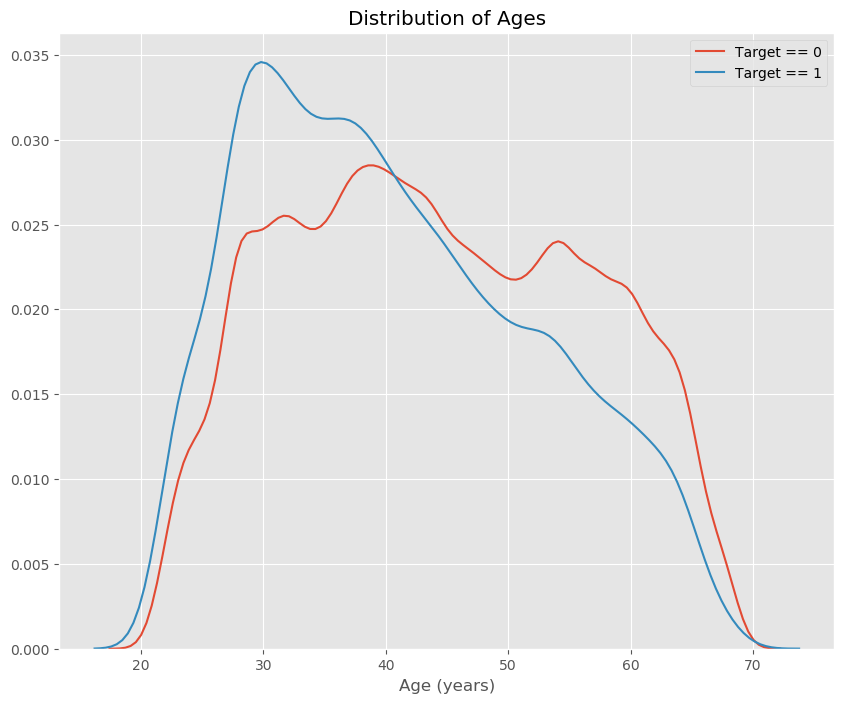

In [34]:
#設定繪圖區域的長與寬
plt.figure(figsize = (10,8))

#Kenel Density Edtimation plot: 會準時還貸款者 - 下圖紅線
sns.kdeplot(app_train.loc[app_train['TARGET'] ==0, 'DAYS_BIRTH'] / 365, label = 'Target == 0')
#Kenel Density Edtimation plot: 不會準時還貸款者 - 下圖藍線
sns.kdeplot(app_train.loc[app_train['TARGET'] ==1, 'DAYS_BIRTH'] / 365, label = 'Target == 1')

# 設定標題與 X, y 軸的說明
plt.xlabel('Age (years)')
plt.title('Distribution of Ages')
plt.ylabel('Density')

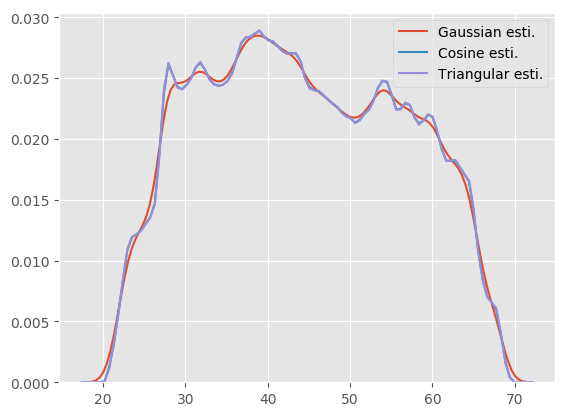

In [35]:
# KDE, 比較不同的 kernel function
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Gaussian esti.', kernel='gau')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Cosine esti.', kernel='cos')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Triangular esti.', kernel='tri')
plt.show()

# It's your turn
## 除了直接觀察變項以外，我們也可以分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

In [39]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

bin_cut = np.linspace(20, 70, num=11)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut)

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()


(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


C:\Users\Alex.Chiu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alex.Chiu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


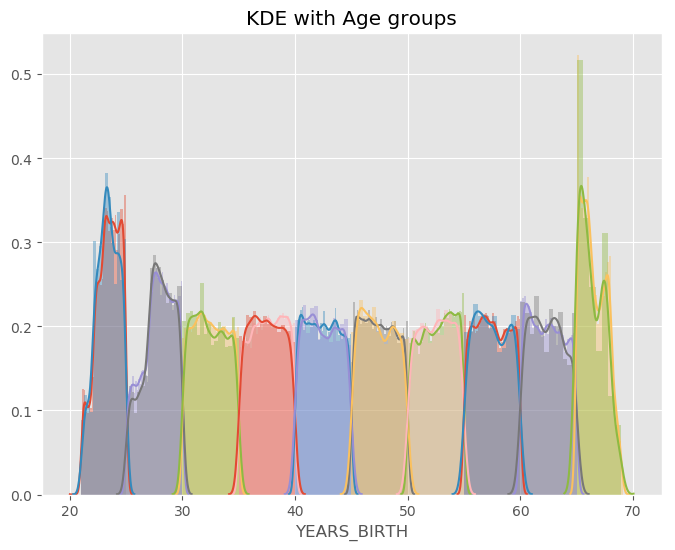

In [52]:
year_group_sorted = sorted(age_data['YEARS_BINNED'].unique())
plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

TypeError: 'str' object is not callable

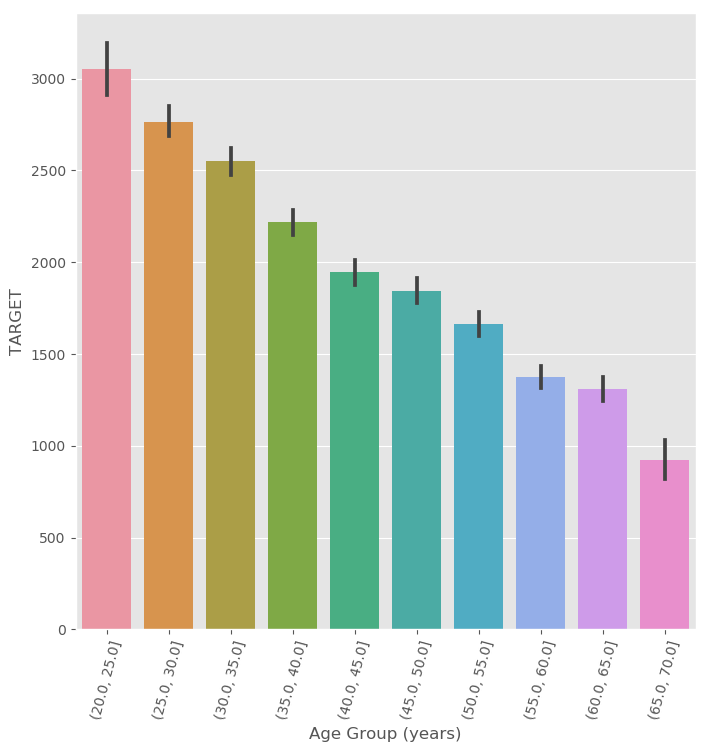

In [57]:
plt.figure(figsize = (8, 8))
sns.barplot(age_data['YEARS_BINNED'],age_data['TARGET']*age_data["TARGET"].sum())
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');